In [104]:
import pandas as pd
df = pd.read_csv('../z20_data/drinks.csv')
df.fillna("NN", inplace=True)
df

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA
189,Vietnam,111,2,1,2.0,AS
190,Yemen,6,0,0,0.1,AS
191,Zambia,32,19,4,2.5,AF


In [105]:
df.columns

Index(['country', 'beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol', 'continent'],
      dtype='object')

In [106]:
# 몇개의 continent가 있는지 알고 싶어.
df['continent'].count()

# 대륙간 국가 개수
# 대륙간 국가 몇개 있는지 출력하시오.
df['continent'].value_counts()

continent
AF    53
EU    45
AS    44
NN    23
OC    16
SA    12
Name: count, dtype: int64

In [107]:
# AF 대륙에 속하는 국가의 맥주소비량 출력하시오.

df[df['continent']=='AF']
df[df['continent']=='AF']['beer_servings'].head()

2      25
4     217
18     34
22    173
26     25
Name: beer_servings, dtype: int64

In [108]:
# 대륙간 맥주 소비량 출력하시오.
df.groupby('continent').sum()

# 대륙간 맥주 소비량
df.groupby('continent')['beer_servings'].sum()


continent
AF    3258
AS    1630
EU    8720
NN    3345
OC    1435
SA    2101
Name: beer_servings, dtype: int64

In [109]:
# 대륙별 평균 wine_servings 출력하시오.
df.groupby('continent')['wine_servings'].mean()

continent
AF     16.264151
AS      9.068182
EU    142.222222
NN     24.521739
OC     35.625000
SA     62.416667
Name: wine_servings, dtype: float64

In [110]:
df.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


In [111]:
# 상관관계 함수 : corr()
# corr(method='') : 두 데이터 간의 상관관계 확인, -1 ~ 1
# method : pearson, kendalㅣ, spearman
df[['beer_servings','wine_servings']].corr(method='pearson') # 0.527... 

# beer_servings 증가 -->  wine_servings 증가해 ==> 값이 1에 가까워

,beer_servings,wine_servings
beer_servings,1.000000,0.527172
wine_servings,0.527172,1.000000


In [112]:
# 데이터 4개 모두 상관관계 행렬 구현
cols = ['beer_servings','spirit_servings','wine_servings','total_litres_of_pure_alcohol']

df[cols].corr(method='pearson')

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
beer_servings,1.000000,0.458819,0.527172,0.835839
spirit_servings,0.458819,1.000000,0.194797,0.654968
wine_servings,0.527172,0.194797,1.000000,0.667598
total_litres_of_pure_alcohol,0.835839,0.654968,0.667598,1.000000


<BarContainer object of 6 artists>

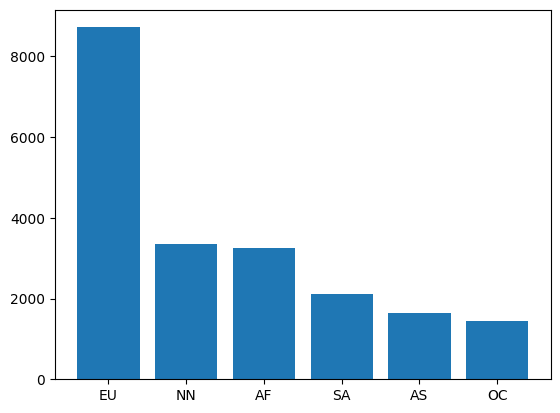

In [113]:
# 대륙별 맥주소비량, 와인소비량 평균, 최소, 최대, 합계를 구하시오.
df.groupby('continent')[['beer_servings', 'wine_servings']].agg(['mean','min','max','sum'])

# 맥주소비량이 가장 높은 대륙을 출력하시오. # ******************* 숙지하기 *****************
df['beer_servings'].max()
df.groupby('continent')['beer_servings'].sum().idxmax()
df.groupby('continent')['beer_servings'].sum().sort_values(ascending=False).index # 'EU', 'NN', 'AF', 'SA', 'AS', 'OC'
df.groupby('continent')['beer_servings'].sum().sort_values(ascending=False).values # 8720, 3345, 3258, 2101, 1630, 1435

# 막대그래프 대륙별 맥주소비량 그래프로 구현하시오.
import matplotlib.pyplot as plt
x = df.groupby('continent')['beer_servings'].sum().sort_values(ascending=False).index
y = df.groupby('continent')['beer_servings'].sum().sort_values(ascending=False).values
# plt.plot(x,y) # plot : 선그래프
plt.bar(x,y) # bar : 막대그래프


In [114]:
# AF와 EU의 맥주 소비량 차이 

df.groupby('continent')['beer_servings'].sum()

# AF 대륙의 나라 출력
df[df['continent']=='AF']
# AF의 맥주 소비량 
beer_af = df[df['continent']=='AF']['beer_servings'].sum()
# EU의 맥주 소비량
beer_eu = df[df['continent']=='EU']['beer_servings'].sum()

beer_eu-beer_af

5462

In [115]:
df.columns

Index(['country', 'beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol', 'continent'],
      dtype='object')

In [116]:
# 컬럼의 모든 술의 총량을 출력하시오.
# total_servings
df['total_servings'] = df['beer_servings']+df['spirit_servings']+df['wine_servings']
df

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,total_servings
0,Afghanistan,0,0,0,0.0,AS,0
1,Albania,89,132,54,4.9,EU,275
2,Algeria,25,0,14,0.7,AF,39
3,Andorra,245,138,312,12.4,EU,695
4,Angola,217,57,45,5.9,AF,319
...,...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA,436
189,Vietnam,111,2,1,2.0,AS,114
190,Yemen,6,0,0,0.1,AS,6
191,Zambia,32,19,4,2.5,AF,55


<BarContainer object of 20 artists>

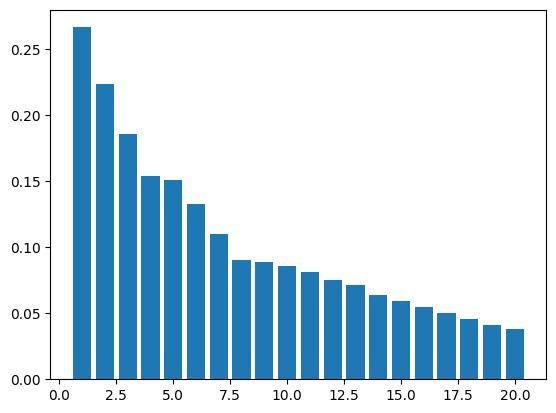

In [131]:
# 술 소비량 대비 알콜 비율이 어느 정도 양이 되는지 출력하시오.
# 'alcohol_rate' 컬럼을 추가해서 정렬하시오.
# 나라별로 역순정렬로 20개까지 출력하시오.
df['total_litres_of_pure_alcohol']/df['total_servings']

# 국가 알콜_rate 비율을 가지고 역순으로 정렬하시오.
df['alcohol_rate'] = df['total_litres_of_pure_alcohol']/df['total_servings']
df.sort_values('alcohol_rate', ascending=False).head(20)[['country','alcohol_rate']]

# 막대그래프로 출력하시오.
import matplotlib.pyplot as plt
x = df.sort_values('alcohol_rate', ascending=False).head(20)['country']
y = df.sort_values('alcohol_rate', ascending=False).head(20)['alcohol_rate']
# plt.bar(x,y) # bar : 막대그래프

# X축 글자(나라명)를 숫자로 바꾸기
# i_list = [i+1 for i in range(20)]

x = [i+1 for i in range(len(x))]
x
plt.bar(x,y) # bar : 막대그래프

